# Week 05: Classification
## Introduction
The goal of this week is to get a first experience with supervised classification.
In particular, we will get familiar with how to set up, run and evaluate experiments.
We will also implement the *k*NN-algorithm and the simple perceptron using pure python.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Dataset
To do machine learning, we need data.
To make it simple, we use scikit-learn to construct a synthetic dataset with
- 2 classes
- 2 numerical features
- 200 items

Since we will be using pure python in this exercise set, we transform the data from numpy arrays to lists.

Don't worry about the magic recipe for how we cook the data for now!

In [69]:
from sklearn.datasets import make_blobs
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X1 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
y1 = [y_np[i] for i in range(X_np.shape[0])]

This is a general form for representing data we will use a lot in this course. We store the features in one list and the labels in another list of the same length. For example, y[14] is the label the dataset ascribes to the input X[14].
(Later on we will use numpy arrays and not lists, e.g. the X_np, y_np, above.)

We can then take a look at the training set.

In [70]:
def show(X, y, marker='.'):
    labels = set(y)
    cl = {lab : [] for lab in labels}
    # cl[lab] shall contain the datapoints labeled cl
    for (a, b) in zip(X, y):
        cl[b].append(a)
    for lab in labels:
        plt.plot([a[0] for a in cl[lab]], [a[1] for a in cl[lab]], 
                 marker, label="class {}".format(lab))
    plt.legend()

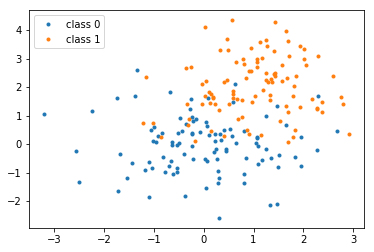

In [71]:
show(X1, y1)

## *k*NN
We will now implement the *k*NN algorithm.
We first need to calculate the distance between two points.

There are, of course, methods, e.g. in numpy, that are more than willing to do this for us. But we are here to learn. So we implement it ourselves.

### Exercise I: Distance
Implement a (L2-) distance function. It should work for points in *n*-dimensional space for any integer *n*>0. Check that dist((3,4,0),(0,0,12)) is 13.

In [72]:
def distance_L2(a,b):
    n = len(a)
    m = len(b)
    assert n == m
    tot = 0
    for x, y in zip(a, b):
        tot += (y-x)**2
    return tot**0.5

assert distance_L2((3,4,0),(0,0,12)) == 13

### Exercise II: Majority class
The next thing we need is a way to determine the majority class from a set of votes. Implement a procedure which takes a list as argument and returns the majority class. 

In [73]:
from collections import Counter

def majority(a):
    counts = Counter(a)
    a = counts.most_common(2)
    if len(a) == 1 or a[0][1] != a[1][1]:
        return a[0][0]
    else:
        return None

#### Hint: Counter
For this we can use the Counter method. If you are not familiar with Counter, experiment with it to see how it works.

In [74]:
from collections import Counter
print("Example")
s = ['a', 'b', 'c', 'b', 'd']
counts = Counter(s)
print(s)
print(counts)
print(counts.most_common(2))
print(majority(s))

Example
['a', 'b', 'c', 'b', 'd']
Counter({'b': 2, 'a': 1, 'c': 1, 'd': 1})
[('b', 2), ('a', 1)]
b


### Exercise III: the *k*NN algorithm
We will use a class for implementing the classifier. We have chosen a format that we can later reuse for various other classifier algorithms. The format is inspired by scikit-learn. We will have a superclass where we can put methods common to the various classification algorithms.

The class will have three methods; one `init` where we set the hyperparameters, one `fit` where the training takes place, and one `predict` which predicts the class of a new item after we have trained the classifier.

The Training will have the form
```python
cls = PykNNClassifier(k=5) # OR some other number, default 3
cls.fit(X_train, y_train)
```

We can then classify a new item by e.g.
```python
p = (1,1)
cls.predict(p)
```

Implement the `predict` method.

In [75]:
class PyClassifier():
    """Common methods to all python classifiers --- if any
    
    Nothing here yet"""

In [76]:
class PykNNClassifier(PyClassifier):
    """kNN classifier using pure python representations"""
    
    def __init__(self, k=3, dist=distance_L2):
        self.k = k
        self.dist = dist
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, a):
        distances = []
        for x in self.X_train:
            distances.append(self.dist(x, a))
        knn = sorted(zip(distances, self.y_train))[:self.k]
        return majority([n[1] for n in knn])

In [77]:
knn_5 = PykNNClassifier(5, distance_L2)
knn_5.fit(X1, y1)
p = (0.1, 3)
knn_5.predict(p)

1

### Exercise IV: *k*
Experiment with kNN_predict(p, X1, y1, k=k) with various points and values
of *k*.
Can you find a point *p* where the class is changed by changing the value of *k*?

## Experiments and evaluation
To check how good the classifier is, we cannot consider singular datapoints. 
We have to see how the classifier performs on a larger test set.
With our synthetic training data, we can make a test set in a similar way.

We follow the same recipe as for the training set, but observe that we use a different *random_state* to get a set different from the training set.

In [78]:
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)
X2 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
y2 = [y_np[i] for i in range(X_np.shape[0])]

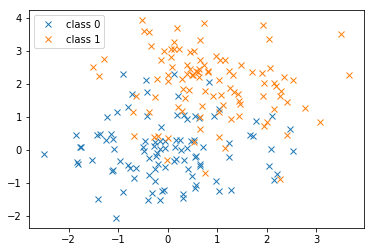

In [79]:
show(X2, y2, 'x')

### Exercise V: Accuracy
There are several different evaluation measures that can be used, and we will see a couple of them the coming weeks. For today, we only consider the simple *accuracy*, the proportion of items classified correctly.
Implement a method for accuracy in `PyClassifier()`, so that it can be reused in other classifiers. 
After you have updated `PyClassifier()`, you have to rerun 
`class PykNNClassifier(PyClassifier)`.
After we have trained the classifier, we can call it as follows:
```python
cls.accuracy(X_test, y_test)
```
It should return a numerical value.

Implement a function which calculates the accuracy of the
kNN_predict.
Test it on X2, y2 when trained on X1, y1 for various values of *k*.
Let *k* be any odd integer below 20. Plot the results.

Beware that there is no *k* which is the best for all datasets. It varies with the dataset. To decide on the best *k* for a specific dataset, we should use a separate development test set to determine the best *k*. Then we fix this *k* and test on the final test set. 

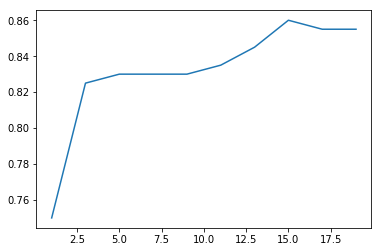

In [80]:
class PyClassifier():
    """Common methods to all python classifiers --- if any"""
    
    def accuracy(self, X_test, y_test, **kwargs):
        """Calculate the accuracy of the classifier 
        using the predict method"""
        n = len(X_test)
        n_correct = 0
        for x, y in zip(X_test, y_test):
            if self.predict(x) == y:
                n_correct += 1
        return n_correct / n

class PykNNClassifier(PyClassifier):
    """kNN classifier using pure python representations"""
    
    def __init__(self, k=3, dist=distance_L2):
        self.k = k
        self.dist = dist
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, a):
        distances = []
        for x in self.X_train:
            distances.append(self.dist(x, a))
        knn = sorted(zip(distances, self.y_train))[:self.k]
        return majority([n[1] for n in knn])

k_list = range(1, 20, 2)
accuracies = []
for k in k_list:
    knn_k = PykNNClassifier(k, distance_L2)
    knn_k.fit(X1, y1)
    accuracies.append(knn_k.accuracy(X2, y2))

plt.plot(k_list, accuracies)
plt.show()

### Exercise VI: Variation

One should be cautious drawing too strong conclusions from an experiment like this. Check whether you get the same result with a different random test set drawn from the same distribution.

## Perceptron classifier
We turn to the perceptron classifier. 
We will first consider some "paper-or-pencil" exercises to get more familiar with the algorithm, before we consider an implementation.

### Exercise VII.i
You want to predict if movies will be profitable based on their screenplays. You hire two critics A and B to read a script you have and rate it on a scale of 1 to 6. The critics are not perfect; here are five data points including the critics' scores and the performance of the movie:
```
| Movie # | Alice    | Bob       | Profitable? |
|  _______|__________|___________|_____________|
|  1      | 1        | 1         |      no     |
|  _______|__________|___________|_____________|
|  2      | 4        | 3         |      yes    |
|  _______|__________|___________|_____________|
|  3      | 3        | 5         |      yes    |
|  _______|__________|___________|_____________|
|  4      | 5        | 6         |      yes    |
|  _______|__________|___________|_____________|
|  5      | 2        | 3         |      no     |
|  _______|__________|___________|_____________|
```
Is the data linearily separable? Plot the data on the 2D plane below; label profitable movies with + and non-profitable movies with - and determine if the data are linearily separable.

In [81]:
import pandas as pd

data = [[1,1,1,0],[2,4,3,1],[3,3,5,1],[4,5,6,1],[5,2,3,0]]
columns = ['Movie nr.', 'Alice', 'Bob', 'Profitable']
table = pd.DataFrame(data, columns=columns)
table

,Movie nr.,Alice,Bob,Profitable
0,1,1,1,0
1,2,4,3,1
2,3,3,5,1
3,4,5,6,1
4,5,2,3,0


### Exercise VII.ii

Now you decide to use a perceptron to classify your data. Suppose you directly use the scores given above as features, together with a bias feature. That is 𝑓0=1, 𝑓1 = score given by A and 𝑓2
= score given by B.

Run one pass through the data with the perceptron algorithm, filling out the table below. Go through the data points in order, e.g. using data point 0 at step 1. For each of the 5 steps write the current state of the weights, the score, and whether the prediction is correct.

```
| Step | Weights    | Score                   | Correct predicition? |
_______|____________|_________________________|______________________|
|  1   | (-1, 0, 0) | -1*1 + 0*1 + 0 * 1 = -1 |      yes             |
_______|____________|_________________________|______________________|
|  2   |            |                         |                      |
_______|____________|_________________________|______________________|
|  3   |            |                         |                      |
_______|____________|_________________________|______________________|
|  4   |            |                         |                      |
_______|____________|_________________________|______________________|
|  5   |            |                         |                      |
_______|____________|_________________________|______________________|

```

[0. 4. 3.]


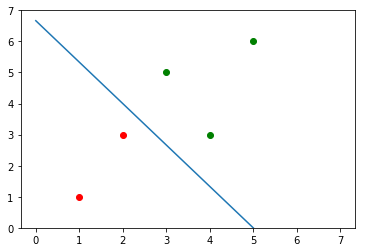

In [82]:
x_1_2 = table[['Alice', 'Bob']].to_numpy()
x_0 = np.zeros((x_1_2.shape[0], 1), dtype=int) + 1
x = np.append(x_0, x_1_2, 1)

y = table['Profitable'].to_numpy()

theta = 20
eta = 1
weights = np.array([-1., 0. ,0.])
n_epochs = 1000

#print("\n%20s |%8s |%5s |%4s" % ("Weights", "x_i", "h", "y_i"))
for i in range(n_epochs):
    #print(i, "---------------------------------------------------")
    for x_i, y_i in zip(x, y):
        h = (x_i * weights).sum()
        y_hat = h > theta
        #print("%20s |%8s |%5.1f |%4d" % (weights, x_i, h, y_i))
        weights = weights + (y_i - y_hat)*eta*x_i
print(weights)

i_prof = np.where(y == 1)
x_prof = x[i_prof, 1:][0].T
i_not_prof = np.where(y != 1)
x_not_prof = x[i_not_prof, 1:][0].T
plt.scatter(*x_prof, c='g')
plt.scatter(*x_not_prof, c='r')

f = lambda x_1, w0, w1, w2, theta: (theta-w0)/w2 - w1/w2*x_1
x_plot = np.arange(8)
plt.plot(x_plot, f(x_plot, *weights, theta))
plt.ylim((0, 7))

plt.show()

### Exercise VII.iii
 Have weights been learned that separate the data?

### Exercise VII.iv
More generally, irrespective of the training data, you want to know if your features are powerful enough to allow you to handle a range of scenarios. Which of the following scenarios can a perceptron using the features above  indeed perfectly classify movies which are profitable according to the given rules:

1. Your reviewers are awesome: if the total of their scores is more than 8, then the movie will definitely be profitable, and otherwise it won't be.

2. Your reviewers are art critics. Your movie will be profitable if and only if each reviewer gives either a score of 3 or a score of 4.

3. Your reviewers have weird but different tastes. Your movie will be profitable if and only if both reviewers agree.

### Exercise VIII, Implementing the perceptron learning algorithm
We will use the same framework as for the *k*NN-classifier. You should implement the two methods `fit` and `predict`. You don't need a `__init__` method. You may include other methods if you find it convenient.

The main part of the perceptron classifier is the `fit` method that trains the perceptron.
`eta`is the learning rate
One `epoch` is a run through all the training data.
We have set the default to one epoch, but you might need more.
Remember to add the bias to the data.

In [83]:
class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""
    
    def fit(self, X_train, y_train, eta=1, theta=0, epochs=1):
        self.x = X_train
        self.y = y_train
        self.weights = np.array([-1., 0., 0.])
        self.theta = theta

        for i in range(epochs):
            for x_i, y_i in zip(X_train, y_train):
                h = (x_i * self.weights).sum()
                y_hat = h > self.theta
                self.weights = self.weights + (y_i - y_hat)*eta*x_i
    
    
    def predict(self, x):
        """Predict the value for the item x"""
    
    def plot_model(self):
        i_prof = np.where(self.y == 1)
        x_prof = self.x[i_prof, 1:][0].T
        i_not_prof = np.where(self.y != 1)
        x_not_prof = self.x[i_not_prof, 1:][0].T
        plt.scatter(*x_prof, c='g')
        plt.scatter(*x_not_prof, c='r')

        f = lambda x_1, w0, w1, w2, theta_: (theta_-w0)/w2 - w1/w2*x_1
        x_plot = np.arange(8)
        plt.plot(x_plot, f(x_plot, *weights, self.theta))
        plt.ylim((0, 7))

        plt.show()


In [84]:
percep = PyPerClassifier()
X1 = np.array(X1)
X_0 = np.zeros((X1.shape[0], 1)) + 1
X1 = np.append(x_0, X1, 1)
percep.fit(X1, np.array(y1), eta=1, theta=20, epochs=1000)
percep.plot_model()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

### Exercise IX
Train PyPerClassifier_on1  X1, y1 and test on X2, y2 as with the *k*NN-classifier. Try various numbers of epochs and see whether it makes a difference.

Is X2, y2 linearly separable?

### Exercise X: termination and weights
- Extend the *PyPerClassifier()* with a method such that we can inspect the weights after training  is completed.
- Modify the *fit*-method of the classifier such that training halts when there are no more updates, and it is possible to inspect how many epochs it took.
- Run this on the five points film critics dataset. How many epochs does it take to reach completion?
- What are the final weights? Can you plot the decision border that corresponds to these weights together with the data set?